<a href="https://colab.research.google.com/github/dschourasia/Algorithms/blob/master/explod1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounting

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


Instance-Normalization and tensorflow 

In [0]:
!pip install git+https://www.github.com/keras-team/keras-contrib.git
!pip install tensorflow==1.14.0

  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-_6c5w9h5
  Running command git clone -q https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-_6c5w9h5
  Created wheel for keras-contrib: filename=keras_contrib-2.0.8-cp36-none-any.whl size=101064 sha256=0589a68a8be8991eb9e18314012b245a15855f1155d341f45778e524e55664d8
  Stored in directory: /tmp/pip-ephem-wheel-cache-_572of72/wheels/11/27/c8/4ed56de7b55f4f61244e2dc6ef3cdbaff2692527a2ce6502ba
Successfully built keras-contrib
     |████████████████████████████████| 109.2MB 93kB/s 
     |████████████████████████████████| 3.2MB 33.6MB/s 
     |████████████████████████████████| 491kB 45.2MB/s 
ERROR: tensorflow-federated 0.12.0 has requirement tensorflow~=2.1.0, but you'll have tensorflow 1.14.0 which is incompatible.
ERROR: tensorflow-federated 0.12.0 has requirement tensorflow-addons~=0.7.0, but you'll have tensorflow-addons 0.8.3 which is incompatible.
  Found existing installation: tenso

More libraries

In [0]:
import random 
import numpy as np
from keras.optimizers import Adam
from keras.models import Model
from keras.models import Sequential
from keras.models import Input
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import Activation
from keras.layers import LeakyReLU
from keras.initializers import RandomNormal
from keras.layers import Concatenate
from keras_contrib.layers.normalization.instancenormalization import InstanceNormalization
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LeakyReLU
from keras.utils.vis_utils import plot_model
# load, split and scale the maps dataset ready for training
from os import listdir
from numpy import asarray
from numpy import vstack
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from numpy import savez_compressed
from numpy import load
from matplotlib import pyplot
import keras.backend

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [0]:
import torch

Load Images

In [0]:
# load all images in a directory into memory
def load_images(path, size=(128,256)):
	src_list, tar_list = list(), list()
	# enumerate filenames in directory, assume all are images
	for filename in listdir(path):
		# load and resize the image
		pixels = load_img(path + filename, target_size=size)
		# convert to numpy array
		pixels = img_to_array(pixels)
		# split into satellite and map
		sat_img, map_img = pixels[:, :128], pixels[:, 128:]
		print(len(src_list))
		src_list.append(sat_img)
		tar_list.append(map_img)
	return [asarray(src_list), asarray(tar_list)]

# dataset path
path = '/content/gdrive/My Drive/maps/train/'
# load dataset
[trainA, trainB] = load_images(path)
print('Loaded: ', trainA.shape, trainB.shape)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [0]:
trainA=trainA.astype('float32')
trainA=trainA/255.0
trainB=trainB.astype('float32')
trainB=trainB/255.0
print(trainA[1])

[[[0.1764706  0.18039216 0.16078432]
  [0.22352941 0.22745098 0.20784314]
  [0.20784314 0.21176471 0.19215687]
  ...
  [0.35686275 0.35686275 0.34901962]
  [0.3019608  0.2784314  0.2784314 ]
  [0.24705882 0.2509804  0.23137255]]

 [[0.34509805 0.34901962 0.32941177]
  [0.19607843 0.2        0.18039216]
  [0.1764706  0.18039216 0.16078432]
  ...
  [0.13725491 0.13725491 0.12941177]
  [0.27450982 0.25882354 0.21176471]
  [0.13333334 0.15294118 0.16470589]]

 [[0.16078432 0.16470589 0.14509805]
  [0.28235295 0.28627452 0.26666668]
  [0.25882354 0.2627451  0.24313726]
  ...
  [0.28627452 0.28627452 0.2784314 ]
  [0.16078432 0.11764706 0.14901961]
  [0.11764706 0.09411765 0.10980392]]

 ...

 [[0.14117648 0.14117648 0.10196079]
  [0.3372549  0.30980393 0.27058825]
  [0.31764707 0.3019608  0.25882354]
  ...
  [0.29411766 0.29803923 0.2784314 ]
  [0.30588236 0.3019608  0.28627452]
  [0.24313726 0.2509804  0.23921569]]

 [[0.14117648 0.14117648 0.10980392]
  [0.30980393 0.30980393 0.2784314 ]


Import images

In [0]:
# save as compressed numpy array
filename = 'maps128.npz'
savez_compressed(filename, trainA, trainB)
print('Saved dataset: ', filename)

Saved dataset:  maps128.npz


Loaded:  (1096, 128, 128, 3) (1096, 128, 128, 3)


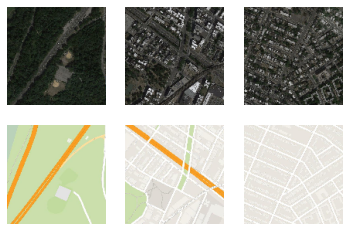

In [0]:
# load the dataset
data = load('maps128.npz')
trainA, trainB = data['arr_0'], data['arr_1']
print('Loaded: ', trainA.shape, trainB.shape)
# plot source images
n_samples = 3
for i in range(n_samples):
	pyplot.subplot(2, n_samples, 1 + i)
	pyplot.axis('off')
	pyplot.imshow(trainA[i].astype('float32'))
# plot target image
for i in range(n_samples):
	pyplot.subplot(2, n_samples, 1 + n_samples + i)
	pyplot.axis('off')
	pyplot.imshow(trainB[i].astype('float32'))
pyplot.show()

Discriminator


In [0]:
cp maps128.npz "/content/gdrive/My Drive"

In [0]:
# define the standalone discriminator model
def define_discriminator(in_shape=(128,128,3)):
	model = Sequential()
	model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same', input_shape=in_shape))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Conv2D(128, (3,3), strides=(2, 2), padding='same', input_shape=in_shape))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Conv2D(256, (3,3), padding='same', input_shape=in_shape))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Conv2D(1, (3,3),  padding='same', input_shape=in_shape))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Flatten())
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
	return model

# define model
model = define_discriminator()
# summarize the model
model.summary()









Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 64)        1792      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 256)       295168    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 32, 32, 256)       0         
_____________________

Resnet , Encoder and Decoder blocks

In [0]:


def resnet_block(n_filters, input_layer):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# first layer convolutional layer
	g = Conv2D(n_filters, (3,3), padding='same', kernel_initializer=init)(input_layer)
	g = InstanceNormalization(axis=-1)(g)
	g = Activation('relu')(g)
	# second convolutional layer
	g = Conv2D(n_filters, (3,3), padding='same', kernel_initializer=init)(g)
	g = InstanceNormalization(axis=-1)(g)
	# concatenate merge channel-wise with input layer
	g = Concatenate()([g, input_layer])
	return g
def encoder_block(image_shape):
	init = RandomNormal(stddev=0.02)
	# image input
	in_image = Input(shape=image_shape)
	# c7s1-64
	g = Conv2D(64, (7,7), padding='same', kernel_initializer=init)(in_image)
	g = InstanceNormalization(axis=-1)(g)
	g = Activation('relu')(g)
	# d128
	g = Conv2D(128, (3,3), strides=(2,2), padding='same', kernel_initializer=init)(g)
	g = InstanceNormalization(axis=-1)(g)
	g = Activation('relu')(g)
	# d256
	g = Conv2D(256, (3,3), strides=(2,2), padding='same', kernel_initializer=init)(g)
	g = InstanceNormalization(axis=-1)(g)
	g = Activation('relu')(g)
	# R256
	for _ in range(3):
		g = resnet_block(256, g)
	model=Model(in_image,g)
	return model
def decoder_block(weird_shape):
	init = RandomNormal(stddev=0.02)
	layer_in = Input(shape = weird_shape)
	g = resnet_block(256, layer_in)
	g = resnet_block(256,g)
	g = resnet_block(256,g)	
	g = Conv2DTranspose(128, (3,3), strides=(2,2), padding='same', kernel_initializer=init)(g)
	g = InstanceNormalization(axis=-1)(g)
	g = Activation('relu')(g)
	# u64
	g = Conv2DTranspose(64, (3,3), strides=(2,2), padding='same', kernel_initializer=init)(g)
	g = InstanceNormalization(axis=-1)(g)
	g = Activation('relu')(g)
	# c7s1-3
	g = Conv2D(3, (7,7), padding='same', kernel_initializer=init)(g)
	g = InstanceNormalization(axis=-1)(g)
	out_image = Activation('tanh')(g)
	model = Model(layer_in,out_image)
	return model

Model initialization

In [0]:
image_shape=(128,128,3)
enc = encoder_block(image_shape)
weird_shape = (32,32,1024)
deca2b = decoder_block(weird_shape)
decb2a = decoder_block(weird_shape)
disa = define_discriminator(image_shape)
disb = define_discriminator(image_shape)
disa.summary()
enc.summary()



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 64, 64, 64)        1792      
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 32, 32, 128)       73856     
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 32, 32, 256)       295168    
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 32, 32, 256)       0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 32, 32, 1)       

Custom losses

In [0]:

def loss1(y_actual,y_predicted):
	value = keras.backend.sum(keras.backend.log(y_actual-y_predicted))
	return value
def loss2(y_actual,y_predicted):
	value = keras.backend.sum(keras.backend.log(y_actual+y_predicted))
	return value


Composite Model

Real,Fake sample and image pool

In [0]:
import random 
# select real samples
def generate_real_samples(dataset, n_samples):
	# choose random instances
	ix = random.sample(range(0, dataset.shape[0]), n_samples)
	# retrieve selected images
	X = dataset[ix]
	# generate 'real' class labels (1)
	y = np.ones((n_samples, 1))
	return X,y
 
# generate n fake samples with class labels

# use the generator to generate n fake examples, with class labels
def generate_fake_samples(enc,dec,X, n_samples):
	X1 = enc.predict(X)
	X2 = dec.predict(X1)
	# create 'fake' class labels (0)
	y = np.zeros((n_samples, 1))
	return X2, y
# update image pool for fake images
def update_image_pool(pool, images, max_size=50):
	selected = list()
	for image in images:
		if len(pool) < max_size:
			# stock the pool
			pool.append(image)
			selected.append(image)
		elif random.random() < 0.5:
			# use image, but don't add it to the pool
			selected.append(image)
		else:
			# replace an existing image and use replaced image
			ix = random.randint(0, len(pool))
			selected.append(pool[ix])
			pool[ix] = image
	return asarray(selected)

Train discriminator

In [0]:
def train_discriminator(enc,dec,model, dataset1,dataset2, n_iter=7, n_batch=256):
	model.trainable = True
	half_batch = int(n_batch / 2)
	# manually enumerate epochs
	for i in range(n_iter):
		# get randomly selected 'real' samples
		X_realA,y_realA = generate_real_samples(dataset1,half_batch)
		X_realB,y_realB = generate_real_samples(dataset2,half_batch)
		# update discriminator on real samples
		_, real_acc = model.train_on_batch(X_realA, y_realA)
		# generate 'fake' examples
		X_fake, y_fake = generate_fake_samples(enc,dec,X_realB,half_batch)
		# update discriminator on fake samples
		_, fake_acc = model.train_on_batch(X_fake, y_fake)
		# summarize performance
		print('>%d real=%.0f%% fake=%.0f%%' % (i+1, real_acc*100, fake_acc*100))
 


In [0]:
train_discriminator(enc,decb2a,disa,trainA,trainB)
train_discriminator(enc,deca2b,disb,trainB,trainA)

>1 real=83% fake=1%
>2 real=99% fake=34%
>3 real=99% fake=100%
>4 real=98% fake=100%
>5 real=100% fake=100%
>6 real=35% fake=100%
>7 real=100% fake=100%
>1 real=100% fake=27%
>2 real=100% fake=84%
>3 real=100% fake=99%
>4 real=100% fake=100%
>5 real=100% fake=100%
>6 real=100% fake=100%
>7 real=100% fake=100%


In [0]:

def composite_model(enc,deca2b,decb2a,disa,disb,image_shape):
	disa.trainable = False
	disb.trainable = False


	input_a = Input(shape=image_shape)
	ea = enc(input_a)
 
	input_b = Input(shape = image_shape)
	eb = enc(input_b)
	#reconstruction
	gaea = decb2a(ea)
	gbeb = deca2b(eb)


	gbea = deca2b(ea)
	gaeb = decb2a(eb)
	#encoding
	egaea = enc(gaea)
	egaeb = enc(gaeb)
	egbea = enc(gbea)
	egbeb = enc(gbeb)
	
	gaegbea = decb2a(egbea)
	gbegaeb = deca2b(egaeb)
	#adversarial
	dagaea = disa(gaea)
	dagaeb = disa(gaeb)
	dagaegbea = disa(gaegbea)

	dbgbeb = disb(gbeb)
	dbgbea = disb(gbea)
	dbgbegaeb = disb(gbegaeb)

	db = disb(input_b)
	da = disa(input_a) 


	model = Model([input_a,input_b],[gaea,gbeb,egbea,egaea,egaeb,egbeb,dagaea,dagaeb,dagaegbea,da,dbgbeb,dbgbea,dbgbegaeb,db])
	opt = Adam(lr=0.0002, beta_1=0.5)
	# compile model with weighting of least squares loss and L1 loss
	model.compile(loss=['mae','mae','mae', 'mae', 'mae', 'mae',loss1,loss1,loss1,loss2,loss1,loss1,loss1,loss2], loss_weights=[0.53,0.53,0.42,0.42,0.42,0.42,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05], optimizer=opt)
	return model

c_model = composite_model(enc,deca2b,decb2a,disa,disb,image_shape)
c_model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
input_7 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
model_1 (Model)                 (None, 32, 32, 1024) 5692416     input_6[0][0]                    
                                                                 input_7[0][0]                    
                                                                 model_3[4][0]                    
                                                                 model_3[5][0]              

Train Whole Model

In [0]:
	def train(enc,deca2b,decb2a,disa,disb,c_model,trainA,trainB):
		# define properties of the training run
		n_epochs, n_batch, = 1, 1
		# prepare image pool for fakes
		poolA, poolB = list(), list()
		# calculate the number of batches per training epoch
		bat_per_epo = int(len(trainA) / n_batch)
		# calculate the number of training iterations
		n_steps = bat_per_epo * n_epochs
		# manually enumerate epochs
		for i in range(n_steps):
			# select a batch of real samples
			X_realA, y_realA = generate_real_samples(trainA, n_batch)
			X_realB, y_realB = generate_real_samples(trainB, n_batch)
			# generate a batch of fake samples
			X_fakeA, y_fakeA = generate_fake_samples(enc,decb2a, X_realB,n_batch)
			X_fakeB, y_fakeB = generate_fake_samples(enc,deca2b, X_realA, n_batch)
			EA = enc.predict(X_realA)
			EB = enc.predict(X_realB)
			one = np.ones((n_batch,1))
			zero = np.zeros((n_batch,1))
			# update generator B->A via adversarial and cycle loss
			g_loss2, _, _, _, _ , _ , _, _, _, _ , _ , _, _, _, _  = c_model.train_on_batch([X_realA, X_realB], [X_realA, X_realB,EA,EA,EB,EB,one,one,one,zero,one,one,one,zero])
			# update discriminator for A -> [real/fake]
			dA_loss1 = disa.train_on_batch(X_realA, y_realA)
			dA_loss2 = disa.train_on_batch(X_fakeA, y_fakeA)
			# update discriminator for B -> [real/fake]
			dB_loss1 = disb.train_on_batch(X_realB, y_realB)
			dB_loss2 = disb.train_on_batch(X_fakeB, y_fakeB)
			print("New")
			print(i)
			print(dA_loss1)
			print(dA_loss2)
			print(g_loss2*100)





In [0]:
train(enc,deca2b,decb2a,disa,disb,c_model,trainA,trainB)

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


New
0
[0.0026968096, 1.0]
[1.00000015e-07, 1.0]
78.2919704914093
New
1
[0.003592439, 1.0]
[0.57605404, 1.0]
73.9423930644989
New
2
[0.012743442, 1.0]
[1.00000015e-07, 1.0]
68.36493015289307
New
3
[0.21776722, 1.0]
[1.00000015e-07, 1.0]
73.61485362052917
New
4
[0.021819403, 1.0]
[1.00000015e-07, 1.0]
75.10043382644653
New
5
[0.011677475, 1.0]
[1.00000015e-07, 1.0]
76.53022408485413
New
6
[0.047552437, 1.0]
[1.00000015e-07, 1.0]
74.65341687202454
New
7
[0.007000456, 1.0]
[1.00000015e-07, 1.0]
87.15136647224426
New
8
[0.009483519, 1.0]
[1.00000015e-07, 1.0]
83.67612957954407
New
9
[0.0059017907, 1.0]
[1.00000015e-07, 1.0]
86.89987659454346
New
10
[0.056345463, 1.0]
[1.00000015e-07, 1.0]
44.12241876125336
New
11
[0.022388004, 1.0]
[1.00000015e-07, 1.0]
95.65926790237427
New
12
[0.0014498604, 1.0]
[0.6685147, 1.0]
97.51533269882202
New
13
[0.104666576, 1.0]
[1.00000015e-07, 1.0]
81.5535306930542
New
14
[0.1348113, 1.0]
[1.00000015e-07, 1.0]
92.17582941055298
New
15
[0.060436554, 1.0]
[1.000

KeyboardInterrupt: ignored

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


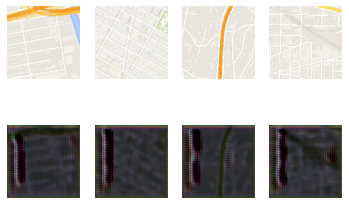

In [0]:
X_realB, y_realB = generate_real_samples(trainB, 4)
# generate a batch of fake samples
X_fakeA, y_fakeA = generate_fake_samples(enc,decb2a, X_realB,4)
n_samples = 4
for i in range(n_samples):
	pyplot.subplot(2, n_samples, 1 + i)
	pyplot.axis('off')
	pyplot.imshow(X_realB[i].astype('float32'))
# plot target image
for i in range(n_samples):
	pyplot.subplot(2, n_samples, 1 + n_samples + i)
	pyplot.axis('off')
	pyplot.imshow(X_fakeA[i].astype('float32'))
pyplot.show()
   

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


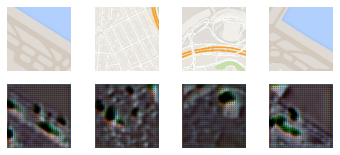

In [0]:
X_realA,X_realB, y_realA = generate_real_samples(trainA,trainB, 4)
# generate a batch of fake samples
X_fakeB, y_fakeB = generate_fake_samples(enc,deca2b, X_realA,4)
n_samples = 4
for i in range(n_samples):
	pyplot.subplot(3, n_samples, 1 + i)
	pyplot.axis('off')
	pyplot.imshow(X_realA[i].astype('float32'))
for i in range(n_samples):
	pyplot.subplot(3, n_samples, 1 + i)
	pyplot.axis('off')
	pyplot.imshow(X_realB[i].astype('float32'))
# plot target image
for i in range(n_samples):
	pyplot.subplot(3, n_samples, 1 + n_samples + i)
	pyplot.axis('off')
	pyplot.imshow(X_fakeB[i].astype('float32'))
pyplot.show()
   